# Programming Assignment: Build a CNN for image recognition.

### Name: Nicolas Jorquera


***I built a Convolutional Neural Network (CNN) from scratch for image recognition. The goal was not just to construct the network, but also to fine-tune the architecture and optimize hyperparameters to achieve high accuracy. I incorporated advanced features like Batch Normalization between Conv and activation layers and utilized Dropout for regularization. I was particularly focused on layer-by-layer construction and didn't rely on pre-built architectures. This experience gave me a deep understanding of how to manually optimize neural networks for specific tasks.***

## 1. Data preparation

### 1.1. Load data


In [3]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [4]:
def to_one_hot(y, num_class=10):
    n = len(y)
    one_hot = np.zeros((n, num_class))
    one_hot[np.arange(n), y[:, 0]] = 1
    return one_hot

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [6]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Explanation:

#### Convolutional Layers (Conv2D):
This function extracts spatial features and patterns from the images. Here I utilized Three convolutional layers with 32, 64, and 128 filters respectively, using 3×3 kernel sizes. Increasing the depth of the network, should enable it to learn more complex features. The hierarchical pattern learning helps in detecting intricate details in images.

#### Batch Normalization Layers (BatchNormalization):
This function normalizes the output of the previous layer, accelerating training and improving generalization. Here it was applied after each convolutional layer, before activation. It helps in faster convergence and mitigates the risk of vanishing/exploding gradients; making the model more stable.

#### Activation Layers (Activation):
This function introduces non-linearity into the network. Here the ReLU (Rectified Linear Unit) activation is used for all hidden layers. It enables the network to model complex non-linear relationships.

#### Max Pooling Layers (MaxPooling2D):
This function reduces the spatial dimensions, emphasizing the most important features. Here I utilized a 2×2 pooling size, applied after each convolutional layer. It should allow to scale down he feature maps, making the network more robust to variations in the object's appearance.

#### Dropout Layers (Dropout):
This function is a regularization technique that randomly sets a fraction of the input units to 0 during training. I chose dropout rates of 0.25 for convolutional layers and 0.5 for the dense layer. It should help prevent overfitting by ensuring that the network does not rely too heavily on any specific feature.

#### Flatten Layer (Flatten):
This function flattens the 2D matrix data into a vector to feed into the dense layers. Here it is applied once before the dense layers. It transforms spatial features into a form suitable for classification; and is necessary between convolutional and dense layers.

#### Dense Layers (Dense):
Here I utilized one hidden dense layer with 512 units and an output layer with 10 units (for 10 classes). The hidden dense layer further processes the features, and the output layer provides class probabilities.

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='s63ame'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        1

In [8]:
from keras import optimizers

learning_rate = 1E-4 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

In [15]:
history = model.fit(x_tr, y_tr, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 62s 49ms/step - loss: 1.7538 - acc: 0.3759 - val_loss: 1.4084 - val_acc: 0.5001
Epoch 2/10
1250/1250 [==============================] - 66s 53ms/step - loss: 1.4099 - acc: 0.4964 - val_loss: 1.2614 - val_acc: 0.5536
Epoch 3/10
1250/1250 [==============================] - 60s 48ms/step - loss: 1.2707 - acc: 0.5522 - val_loss: 1.3035 - val_acc: 0.5619
Epoch 4/10
1250/1250 [==============================] - 68s 55ms/step - loss: 1.1766 - acc: 0.5936 - val_loss: 1.2018 - val_acc: 0.5757
Epoch 5/10
1250/1250 [==============================] - 65s 52ms/step - loss: 1.0954 - acc: 0.6253 - val_loss: 1.0887 - val_acc: 0.6168
Epoch 6/10
1250/1250 [==============================] - 64s 51ms/step - loss: 1.0515 - acc: 0.6444 - val_loss: 1.0054 - val_acc: 0.6616
Epoch 7/10
1250/1250 [==============================] - 61s 49ms/step - loss: 1.0261 - acc: 0.6597 - val_loss: 0.8781 - val_acc: 0.7068
Epoch 8/10
1250/1250 [==========================

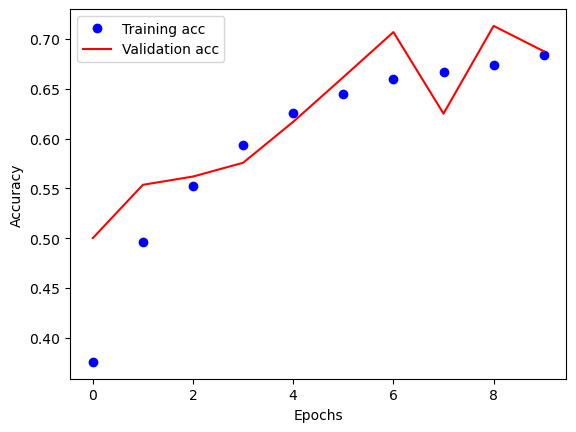

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [11]:
history = model.fit(x_train, y_train_vec, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9982 - acc: 0.6702 - val_loss: 1.0242 - val_acc: 0.6528
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9848 - acc: 0.6761 - val_loss: 0.9541 - val_acc: 0.6798
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9785 - acc: 0.6809 - val_loss: 0.9046 - val_acc: 0.6831
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9759 - acc: 0.6817 - val_loss: 1.1605 - val_acc: 0.6409
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9848 - acc: 0.6844 - val_loss: 0.7799 - val_acc: 0.7435
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9914 - acc: 0.6798 - val_loss: 0.8538 - val_acc: 0.7409
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9926 - acc: 0.6817 - val_loss: 1.0052 - val_acc: 0.6875
Epoch 8/10
1563/1563 [==========================

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [12]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 3s 8ms/step - loss: 1.1145 - acc: 0.6394
loss = 1.114530324935913
accuracy = 0.6394000053405762


### 4. Experimenting on Improving the Model further using more Advanced Techniques:

In [13]:
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [22]:
# Create model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_15 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_15 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_16 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_16 (Activation)  (None, 32, 32, 32)       

In [23]:
# Compile model
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning Rate Reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [17]:
# Fit the model
batch_size = 64
epochs = 50
history = model.fit(datagen.flow(x_tr, y_tr, batch_size=batch_size),
          epochs=epochs,
          validation_data=(x_val, y_val),
          callbacks=[learning_rate_reduction])

Epoch 1/50
625/625 [==============================] - 96s 150ms/step - loss: 1.8311 - accuracy: 0.3366 - val_loss: 857.1834 - val_accuracy: 0.1200 - lr: 0.0010
Epoch 2/50
625/625 [==============================] - 95s 152ms/step - loss: 1.4945 - accuracy: 0.4551 - val_loss: 562.8972 - val_accuracy: 0.1567 - lr: 0.0010
Epoch 3/50
625/625 [==============================] - 99s 159ms/step - loss: 1.3259 - accuracy: 0.5223 - val_loss: 615.9886 - val_accuracy: 0.1049 - lr: 0.0010
Epoch 4/50
625/625 [==============================] - 97s 156ms/step - loss: 1.2048 - accuracy: 0.5740 - val_loss: 341.0070 - val_accuracy: 0.1333 - lr: 0.0010
Epoch 5/50
625/625 [==============================] - ETA: 0s - loss: 1.1213 - accuracy: 0.6073
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 [==============================] - 94s 150ms/step - loss: 1.1213 - accuracy: 0.6073 - val_loss: 379.1577 - val_accuracy: 0.1344 - lr: 0.0010
Epoch 6/50
625/625 [===================

In [20]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 5s 16ms/step - loss: 89.3712 - accuracy: 0.3094
loss = 89.37116241455078
accuracy = 0.3093999922275543


### Final Notes
- I was curious to see how increasing the number of epochs, augmenting the data to add variability; and adding a Learning Rate Reduction would influence the model. While testing the model with the training data the model performed a lot better; achieving an accuracy of 0.8. However; clearly this model was overfitted since at epoch 25 the model's accuracy stopped improving. This was seen when the model was tested using the test data; and it only achieved an accuracy of 0.3. Below I will run the same model with only 25 epochs to see if the model performs better.

In [24]:
# Fit the model
batch_size = 64
epochs = 25
history = model.fit(datagen.flow(x_tr, y_tr, batch_size=batch_size),
          epochs=epochs,
          validation_data=(x_val, y_val),
          callbacks=[learning_rate_reduction])

Epoch 1/25
625/625 [==============================] - 106s 167ms/step - loss: 1.8348 - accuracy: 0.3380 - val_loss: 319.5312 - val_accuracy: 0.1758 - lr: 0.0010
Epoch 2/25
625/625 [==============================] - 102s 162ms/step - loss: 1.4792 - accuracy: 0.4641 - val_loss: 250.9285 - val_accuracy: 0.1665 - lr: 0.0010
Epoch 3/25
625/625 [==============================] - 106s 169ms/step - loss: 1.3251 - accuracy: 0.5250 - val_loss: 324.6452 - val_accuracy: 0.1516 - lr: 0.0010
Epoch 4/25
625/625 [==============================] - ETA: 0s - loss: 1.2073 - accuracy: 0.5726
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 [==============================] - 97s 156ms/step - loss: 1.2073 - accuracy: 0.5726 - val_loss: 362.2020 - val_accuracy: 0.1406 - lr: 0.0010
Epoch 5/25
625/625 [==============================] - 103s 164ms/step - loss: 1.0774 - accuracy: 0.6197 - val_loss: 161.1862 - val_accuracy: 0.2567 - lr: 5.0000e-04
Epoch 6/25
625/625 [===========